In [12]:
import pandas as pd
import MetaTrader5 as mt
from methods.make_single_df_from_bid_ask import make_single_df_from_bid_ask
from methods.make_dataframe_line import make_dataframe_line
# from methods.make_5min_volume_from_1_min_volume import make_5min_volume_from_1min_volume
from machine_learning_models.lstm.eurusd.lstm_predict_candle import predict_candle
# from machine_learning_models.lstm.eurusd.lstm_use_prediction import use_prediction
from machine_learning_models.lstm.lstm_collect_predictions_into_dataframe import collect_predictions_into_dataframe
# import torch

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
if not mt.initialize():
    print("initialize() failed, error code =", mt.last_error())
    quit()

account=52234337
pw='b&89zG&!PruWtP'

authorized = mt.login(account, pw)

In [4]:
# Display all rows
pd.set_option('display.max_rows', None)

# Display all columns
pd.set_option('display.max_columns', None)

# Prevent column width truncation
pd.set_option('display.max_colwidth', None)

# Display full content without wrapping
pd.set_option('display.expand_frame_repr', False)

In [5]:
def make_clean_dataframe_from_server(symbol:str, timeframe, start_pos:int, end_pos:int) -> pd.DataFrame:
   mt_dataframe_raw = mt.copy_rates_from_pos(symbol, timeframe, start_pos, end_pos)
   df = pd.DataFrame(mt_dataframe_raw)
   df['time']=pd.to_datetime(df['time'], unit='s')
   df.set_index(['time'], inplace=True)
   df.rename(columns={'tick_volume': 'volume'}, inplace=True)
   df.drop(['spread', 'real_volume'], axis=1, inplace=True)
   df.sort_index(ascending=True, inplace=True)

   return df

In [16]:
fig = plt.figure(figsize=(10, 15))

<Figure size 1000x1500 with 0 Axes>

In [6]:
symbols = [
    'AUDUSD',
    'XBRUSD',
    'USDJPY',
    'CADUSD'
]

In [7]:
TIMEFRAME_SMALL_MT = mt.TIMEFRAME_M5

In [9]:
df_for_corr = make_dataframe_line(timeframe=TIMEFRAME_SMALL_MT, start_pos=0, end_pos=500)

In [25]:
df_for_corr = df_for_corr.drop(['+DI', '-DI', 'ADX', 'ADL', 'ATR_14', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist'], axis=1)

In [26]:
corr = df_for_corr.corr()

In [28]:
corr

,open,high,low,close,volume,open_audusd,high_audusd,low_audusd,close_audusd,volume_audusd,open_brentusd,high_brentusd,low_brentusd,close_brentusd,volume_brentusd,open_cadusd,high_cadusd,low_cadusd,close_cadusd,volume_cadusd,open_jpyusd,high_jpyusd,low_jpyusd,close_jpyusd,volume_jpyusd
open,1.000000,0.992187,0.987326,0.981045,0.128511,0.903597,0.901223,0.901675,0.896816,0.164107,0.289073,0.304762,0.269444,0.285234,0.091550,-0.664236,-0.659738,-0.654825,-0.652252,0.084319,-0.787382,-0.798558,-0.782143,-0.788519,0.041211
high,0.992187,1.000000,0.984265,0.988619,0.181172,0.906105,0.909499,0.905856,0.905347,0.215346,0.271210,0.290306,0.246527,0.266957,0.132282,-0.673297,-0.670135,-0.668464,-0.665980,0.134076,-0.801376,-0.815275,-0.804305,-0.811216,0.094013
low,0.987326,0.984265,1.000000,0.993459,0.043509,0.887349,0.888162,0.896625,0.891977,0.085438,0.307681,0.319386,0.297020,0.309661,0.030478,-0.658354,-0.661345,-0.650009,-0.653590,0.018820,-0.752684,-0.772121,-0.748294,-0.762136,-0.033488
close,0.981045,0.988619,0.993459,1.000000,0.098964,0.892736,0.898314,0.902423,0.903521,0.138562,0.287862,0.303761,0.274149,0.290994,0.073574,-0.665442,-0.668285,-0.660996,-0.665026,0.068619,-0.773271,-0.792122,-0.773483,-0.788232,0.022041
volume,0.128511,0.181172,0.043509,0.098964,1.000000,0.210050,0.228103,0.163229,0.191484,0.931511,-0.282365,-0.219029,-0.355604,-0.293948,0.758945,-0.114488,-0.083950,-0.137110,-0.109386,0.818082,-0.467135,-0.436730,-0.500121,-0.467329,0.935966
open_audusd,0.903597,0.906105,0.887349,0.892736,0.210050,1.000000,0.996489,0.995358,0.991275,0.271836,0.285324,0.313548,0.253610,0.283925,0.250979,-0.803775,-0.795340,-0.797112,-0.791869,0.213735,-0.832650,-0.842411,-0.828430,-0.834831,0.142045
high_audusd,0.901223,0.909499,0.888162,0.898314,0.228103,0.996489,1.000000,0.994952,0.996196,0.293896,0.276511,0.309055,0.245680,0.279561,0.270876,-0.807714,-0.800862,-0.804859,-0.800266,0.236119,-0.840880,-0.851460,-0.839154,-0.845816,0.165148
low_audusd,0.901675,0.905856,0.896625,0.902423,0.163229,0.995358,0.994952,1.000000,0.996241,0.226712,0.297924,0.324853,0.273065,0.301943,0.213925,-0.807633,-0.803666,-0.801929,-0.800339,0.178360,-0.814797,-0.827882,-0.809971,-0.819770,0.101283
close_audusd,0.896816,0.905347,0.891977,0.903521,0.191484,0.991275,0.996196,0.996241,1.000000,0.258050,0.283515,0.314480,0.258451,0.291476,0.239521,-0.808593,-0.805112,-0.806346,-0.805821,0.207641,-0.826516,-0.839038,-0.823828,-0.833929,0.132850
volume_audusd,0.164107,0.215346,0.085438,0.138562,0.931511,0.271836,0.293896,0.226712,0.258050,1.000000,-0.225073,-0.153964,-0.299962,-0.232633,0.798531,-0.224532,-0.195893,-0.248453,-0.222564,0.857577,-0.532517,-0.505883,-0.562796,-0.533192,0.908461


In [32]:
sns.set_theme(rc={'figure.figsize':(20,14)})

<Axes: >

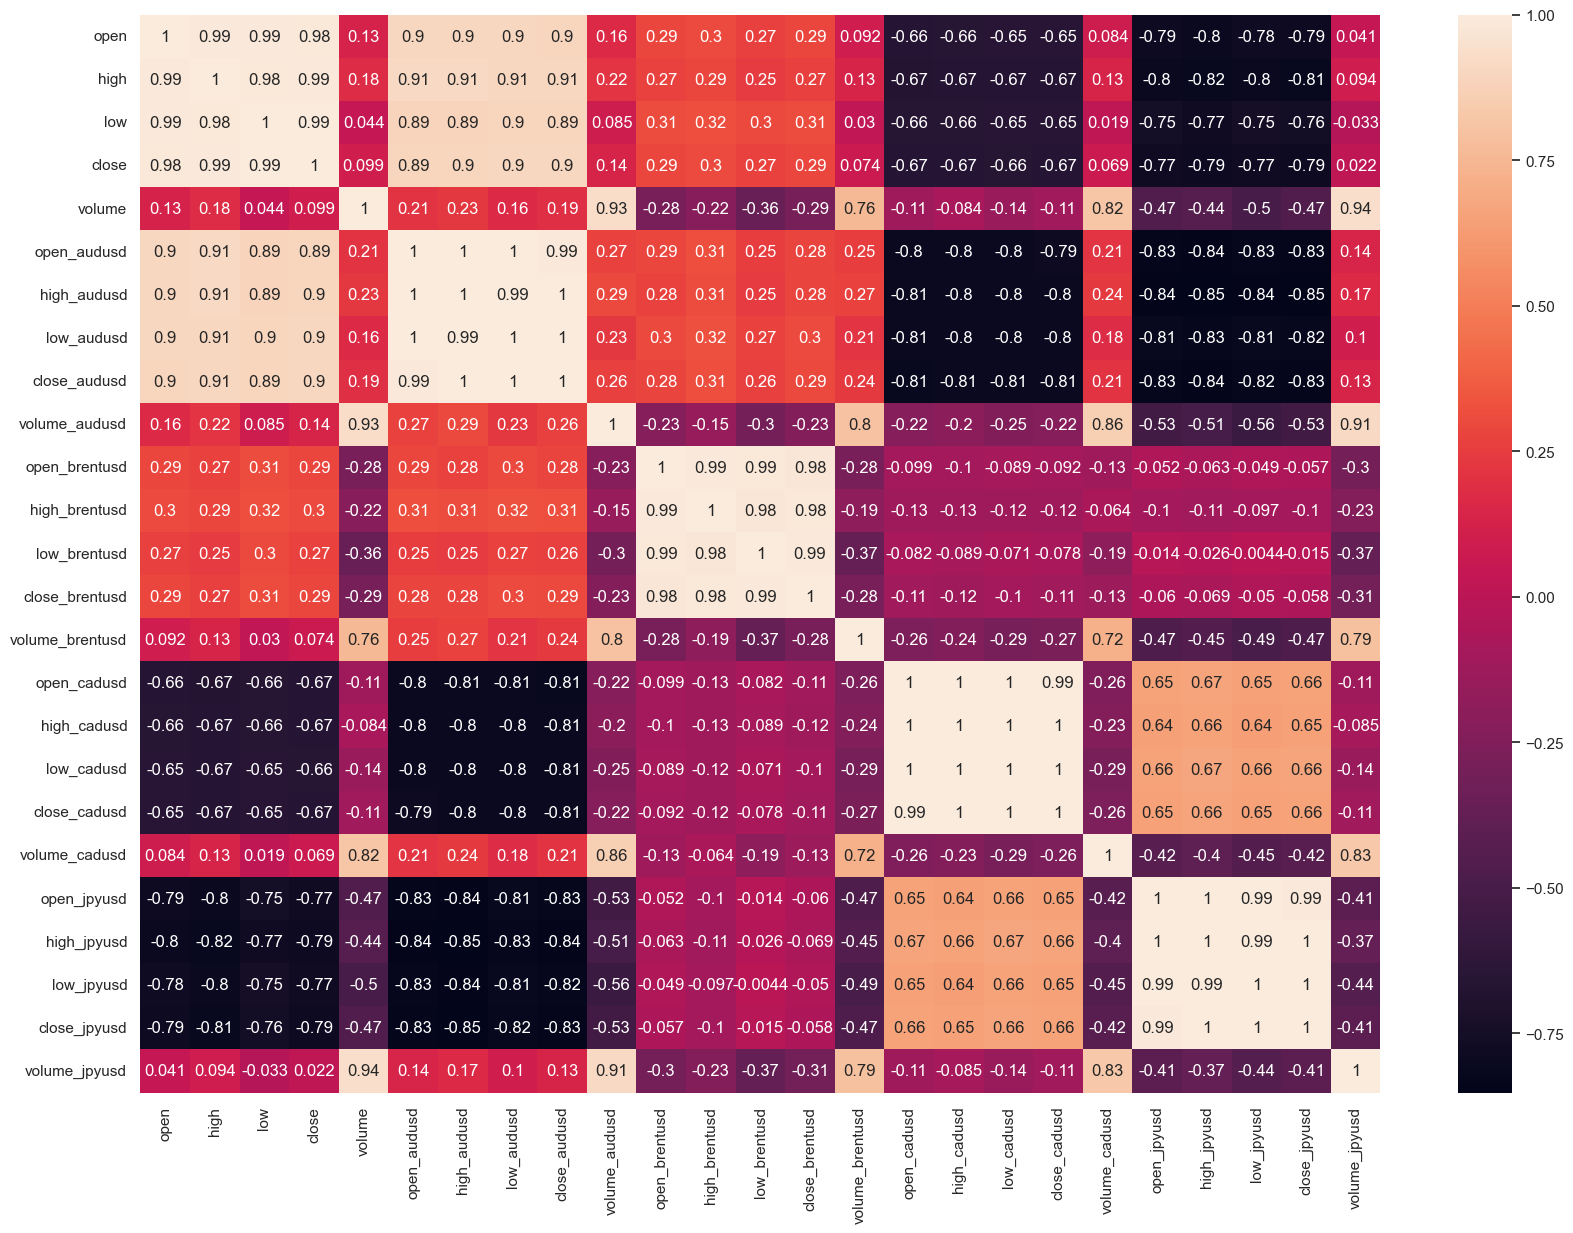

In [33]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

In [25]:
df_from_server = make_dataframe_line(timeframe=TIMEFRAME_SMALL_MT, start_pos=0, end_pos=92)

In [26]:
len(df_from_server)

61

In [27]:
BASE_DIR = 'hist_data/'
TIME_SERIES_FOLDER = 'EURUSD/'
BID_FOLDER = '5_min/Bid/'
ASK_FOLDER = '5_min/Ask/'

BASE_DIR_LSTM = 'machine_learning_models/lstm/eurusd/pickle_files'
LSTM_MAX_VAL = BASE_DIR_LSTM + '/lstm_regressor_predict_max_values-2025-04-07.pkl'
LSTM_MIN_VAL = BASE_DIR_LSTM + '/lstm_regressor_predict_min_values-2025-04-07.pkl'
SCALER_X_MIN = BASE_DIR_LSTM + '/lstm_regressor_scaler_x_min.pkl'
SCALER_X_MAX = BASE_DIR_LSTM + '/lstm_regressor_scaler_x_max.pkl'
SCALER_Y_MIN = BASE_DIR_LSTM + '/lstm_regressor_scaler_y_min.pkl'
SCALER_Y_MAX = BASE_DIR_LSTM + '/lstm_regressor_scaler_y_max.pkl'

In [28]:
len(df_from_server)

61

In [29]:
df_joined_train, df_joined_test, df_joined_val = make_single_df_from_bid_ask(
    base_dir=BASE_DIR,
    time_series_folder=TIME_SERIES_FOLDER
)

In [30]:
print(len(df_joined_train), len(df_joined_test), len(df_joined_val))

13845 4615 4616


In [31]:
columns_for_y = [
        "open_plus_5min",
        "high_plus_5min",
        "low_plus_5min",
        "close_plus_5min",
        "open_plus_10min",    
        "high_plus_10min",
        "low_plus_10min",
        "close_plus_10min",
        "open_plus_15min",
        "high_plus_15min",
        "low_plus_15min",
        "close_plus_15min",
        "open_plus_20min",
        "high_plus_20min",
        "low_plus_20min",
        "close_plus_20min",
        "open_plus_25min",
        "high_plus_25min",
        "low_plus_25min",
        "close_plus_25min",
        "open_plus_30min",
        "high_plus_30min",
        "low_plus_30min",
        "close_plus_30min",
        "open_plus_35min",
        "high_plus_35min",
        "low_plus_35min",
        "close_plus_35min",
        "open_plus_40min",
        "high_plus_40min",
        "low_plus_40min",
        "close_plus_40min"
    ]

In [ ]:
for col in columns_for_y:
    predict_candle(df=df_joined_train, test_df=df_joined_test, validation_df=df_joined_val, base_dir=BASE_DIR_LSTM, column_for_y=col)

In [33]:
dataframe_actual = df_joined_val.tail(8)

In [34]:
len(df_joined_val)

4616

In [35]:
dataframe_line = df_joined_val.iloc[4547:4608]

In [36]:
len(dataframe_line)

61

In [37]:
dataframe_predicted = collect_predictions_into_dataframe(dataframe_line=dataframe_line, base_dir_lstm=BASE_DIR_LSTM)

e:\1.WORKING-FOLDER\Свой-бизнес\Приложение_для_торговли_на_форекс_и_фондовом_рынке\python_algo_ai\machine_learning_models\lstm\lstm_collect_predictions_into_dataframe.py:71: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  open_values = pd.concat([open_values, pd.Series([predicted_value])], ignore_index=True)
e:\1.WORKING-FOLDER\Свой-бизнес\Приложение_для_торговли_на_форекс_и_фондовом_рынке\python_algo_ai\machine_learning_models\lstm\lstm_collect_predictions_into_dataframe.py:73: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  high_values = pd.concat([high_va

In [38]:
dataframe_predicted_from_server = collect_predictions_into_dataframe(dataframe_line=df_from_server, base_dir_lstm=BASE_DIR_LSTM)

e:\1.WORKING-FOLDER\Свой-бизнес\Приложение_для_торговли_на_форекс_и_фондовом_рынке\python_algo_ai\machine_learning_models\lstm\lstm_collect_predictions_into_dataframe.py:71: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  open_values = pd.concat([open_values, pd.Series([predicted_value])], ignore_index=True)
e:\1.WORKING-FOLDER\Свой-бизнес\Приложение_для_торговли_на_форекс_и_фондовом_рынке\python_algo_ai\machine_learning_models\lstm\lstm_collect_predictions_into_dataframe.py:73: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  high_values = pd.concat([high_va

In [39]:
dataframe_predicted_from_server

,open,high,low,close
2025-05-19 07:30:00,1.075377,1.076814,1.080789,1.076232
2025-05-19 07:35:00,1.075250,1.077784,1.071479,1.072611
2025-05-19 07:40:00,1.073302,1.071467,1.071329,1.071070
2025-05-19 07:45:00,1.072654,1.072949,1.074550,1.073447
2025-05-19 07:50:00,1.077282,1.071073,1.072696,1.072657
2025-05-19 07:55:00,1.072933,1.073526,1.074306,1.072943
2025-05-19 08:00:00,1.073411,1.072964,1.074182,1.068992
2025-05-19 08:05:00,1.076073,1.077262,1.071470,1.079861


In [48]:
df_test = dataframe_actual[['open', 'high', 'low', 'close']].copy()

In [49]:
df_test.index = dataframe_predicted.index.to_list()

In [50]:
df_test

,open,high,low,close
2025-04-24 20:40:00,1.13949,1.13968,1.13943,1.13965
2025-04-24 20:45:00,1.13957,1.13983,1.13956,1.13982
2025-04-24 20:50:00,1.13982,1.13982,1.13932,1.13936
2025-04-24 20:55:00,1.13943,1.13944,1.13853,1.13854
2025-04-24 21:00:00,1.13484,1.13520,1.13484,1.13503
2025-04-24 21:05:00,1.13502,1.13507,1.13492,1.13502
2025-04-24 21:10:00,1.13501,1.13519,1.13484,1.13492
2025-04-24 21:15:00,1.13490,1.13520,1.13482,1.13510


In [41]:
dataframe_predicted

,open,high,low,close
2025-04-24 20:40:00,1.093758,1.096595,1.096088,1.097692
2025-04-24 20:45:00,1.095082,1.095534,1.095887,1.096157
2025-04-24 20:50:00,1.096390,1.097448,1.094147,1.096993
2025-04-24 20:55:00,1.096752,1.094848,1.097177,1.095333
2025-04-24 21:00:00,1.094807,1.095214,1.097806,1.093498
2025-04-24 21:05:00,1.096133,1.094785,1.098798,1.093403
2025-04-24 21:10:00,1.093172,1.094659,1.093562,1.095735
2025-04-24 21:15:00,1.096783,1.094513,1.096123,1.093028


In [52]:
df_result = df_test.subtract(dataframe_predicted, axis=1)

In [53]:
df_result.mean()

open     0.041900
high     0.041979
low      0.040834
close    0.041950
dtype: float64

In [54]:
dataframe_predicted.add(0.041)

,open,high,low,close
2025-04-24 20:40:00,1.134758,1.137595,1.137088,1.138692
2025-04-24 20:45:00,1.136082,1.136534,1.136887,1.137157
2025-04-24 20:50:00,1.137390,1.138448,1.135147,1.137993
2025-04-24 20:55:00,1.137752,1.135848,1.138177,1.136333
2025-04-24 21:00:00,1.135807,1.136214,1.138806,1.134498
2025-04-24 21:05:00,1.137133,1.135785,1.139798,1.134403
2025-04-24 21:10:00,1.134172,1.135659,1.134562,1.136735
2025-04-24 21:15:00,1.137783,1.135513,1.137123,1.134028


In [42]:
# predict_min_stats(df_joined_train, df_joined_test, df_joined_val, scaler_x_dir=SCALER_X_MIN, scaler_y_dir=SCALER_Y_MIN, model_dir=LSTM_MIN_VAL)

In [43]:
# predict_max_stats(df_joined_train, df_joined_test, df_joined_val, scaler_x_dir=SCALER_X_MAX, scaler_y_dir=SCALER_Y_MAX, model_dir=LSTM_MAX_VAL)